# Cyclistic
## Estudo de caso 

### Projeto final Google Data Analytic

Está análise foi realizada em cima de um volume muito grande dados. Onde a melhor opção foi utilizar a linguagem R para conhecer, unificar, limpar e processar os dados, para a etapa de apresentação e anaálise escolhi o PowerBI



## Objetivo

As partes interessadas definiram um objetivo claro: **criar estratégias de marketing destinadas a converter usuários casuais em membros anuais**.

Para atender aos objetivos do cliente, o foco da minha análise será **encontrar diferenças entre os usuários**.

## Sobre os dados

Há um repositório online (https://divvy-tripdata.s3.amazonaws.com/index.html), como vários arquivos no formato csv que podem ser utilizados para a análise.
Escolhi e baixei os arquivos que contém os dados coletados entre março de 2023 e feveireiro de 2024 atualizados em 4 de março de 2024 ás 11:37:52 am, para ter a visão dos últimos 12 meses.

### Segurança dos dados
Após os download de todos os aquivos, armazenei no diretório dadosoriginais. Criado especificamente pra manter os dados seguros e a disposição caso seja necessário utilizá-los novamente.

## Preparando ambiente

Inicialmente vou instalar e carregar as bibliotecas essenciais para que eu consiga trabalhar os dados de forma eficiente na linguagem R.

***São eles:***

* tidyverse - consiste em uma coleção de outros pacotes para análise de dados, contempla ferramentas para manipulação, exploração e visualização.

* lubridate - simplifica a leitura, extração e conversão de datas.

In [ ]:
install.packages("tidyverse")
install.packages("lubridate")
library(tidyverse)
library(lubridate)

## Carregando os dados para o ambiente de trabalho

Vou armazenar cada dado em uma variável contendo o nome correspondente ao mês em que os dados foram coletados

In [1]:
tripdata_202303 <- read_csv("/kaggle/input/dadosoriginais/202303-divvy-tripdata.csv")
tripdata_202304 <- read_csv("/kaggle/input/dadosoriginais/202304-divvy-tripdata.csv")
tripdata_202305 <- read_csv("/kaggle/input/dadosoriginais/202305-divvy-tripdata.csv")
tripdata_202306 <- read_csv("/kaggle/input/dadosoriginais/202306-divvy-tripdata.csv")
tripdata_202307 <- read_csv("/kaggle/input/dadosoriginais/202307-divvy-tripdata.csv")
tripdata_202308 <- read_csv("/kaggle/input/dadosoriginais/202308-divvy-tripdata.csv")
tripdata_202309 <- read_csv("/kaggle/input/dadosoriginais/202309-divvy-tripdata.csv")
tripdata_202310 <- read_csv("/kaggle/input/dadosoriginais/202310-divvy-tripdata.csv")
tripdata_202311 <- read_csv("/kaggle/input/dadosoriginais/202311-divvy-tripdata.csv")
tripdata_202312 <- read_csv("/kaggle/input/dadosoriginais/202312-divvy-tripdata.csv")
tripdata_202401 <- read_csv("/kaggle/input/dadosoriginais/202401-divvy-tripdata.csv")
tripdata_202402 <- read_csv("/kaggle/input/dadosoriginais/202402-divvy-tripdata.csv")

ERROR: Error in read_csv("/kaggle/input/dadosoriginais/202303-divvy-tripdata.csv"): could not find function "read_csv"


### Conhecendo a base de dados

Utilizando o primeiro arquivo como exemplo.

In [6]:
glimpse(tripdata_202303)

Rows: 2,009,716
Columns: 13
$ ride_id            <chr> "6842AA605EE9FBB3", "F984267A75B99A8C", "FF7CF57CFE…
$ rideable_type      <chr> "electric_bike", "electric_bike", "classic_bike", "…
$ started_at         <dttm> 2023-03-16 08:20:34, 2023-03-04 14:07:06, 2023-03-…
$ ended_at           <dttm> 2023-03-16 08:22:52, 2023-03-04 14:15:31, 2023-03-…
$ start_station_name <chr> "Clark St & Armitage Ave", "Public Rack - Kedzie Av…
$ start_station_id   <chr> "13146", "491", "620", "TA1306000003", "18067", "62…
$ end_station_name   <chr> "Larrabee St & Webster Ave", NA, "Clark St & Randol…
$ end_station_id     <chr> "13193", NA, "TA1305000030", "13154", "TA1306000015…
$ start_lat          <dbl> 41.91841, 41.97000, 41.89820, 41.88872, 41.91448, 4…
$ start_lng          <dbl> -87.63645, -87.71000, -87.63754, -87.64445, -87.668…
$ end_lat            <dbl> 41.92182, 41.95000, 41.88458, 41.91052, 41.88578, 4…
$ end_lng            <dbl> -87.64414, -87.71000, -87.63189, -87.65311, -87.651…
$ member_cas

Observando a amostra, que contempla os dados coletados em março de 2023, vejo que há mais de 2 milhões de linhas. Já consigo ter uma idéia da dimensão do conjunto de dados.

### Variáveis do conjunto de dados

Cada registro é composto por 13 colunas que vamos conhecer a seguir:

* ride_id: código único que identifica cada viagem;

* rideable_type: identifica o tipo de bicileta utilizada;

* started_at: data e hora de início;

* ended_at: data e hora de término;

* start_station_name: nome da estação de início;

* start_station_id: código de identificação da estação de início;

* end_station_name: nome da estação de término;

* end_station_id: código de identificação da estação de término;

* start_lat: latitude do ponto de início;

* start_lng: longitude do ponto de início;

* end_lat: latitude do ponto de término;

* end_lng: longitude do ponto de término;

* member_casual: identifica se o cliente é anual ou casual.



## Unificando os arquivos em um único dataset

Otimizando o nosso trabalho, vou unificar todas as variáveis para que no final, possamos trabalhar com um único dataset.

In [7]:
df_tripdata <- bind_rows(tripdata_202303, tripdata_202304, tripdata_202305, tripdata_202306, tripdata_202307, tripdata_202308, tripdata_202309, tripdata_202310, tripdata_202311, tripdata_202312, tripdata_202401, tripdata_202402)


In [8]:
glimpse(df_tripdata)

Rows: 7,458,206
Columns: 13
$ ride_id            <chr> "6842AA605EE9FBB3", "F984267A75B99A8C", "FF7CF57CFE…
$ rideable_type      <chr> "electric_bike", "electric_bike", "classic_bike", "…
$ started_at         <dttm> 2023-03-16 08:20:34, 2023-03-04 14:07:06, 2023-03-…
$ ended_at           <dttm> 2023-03-16 08:22:52, 2023-03-04 14:15:31, 2023-03-…
$ start_station_name <chr> "Clark St & Armitage Ave", "Public Rack - Kedzie Av…
$ start_station_id   <chr> "13146", "491", "620", "TA1306000003", "18067", "62…
$ end_station_name   <chr> "Larrabee St & Webster Ave", NA, "Clark St & Randol…
$ end_station_id     <chr> "13193", NA, "TA1305000030", "13154", "TA1306000015…
$ start_lat          <dbl> 41.91841, 41.97000, 41.89820, 41.88872, 41.91448, 4…
$ start_lng          <dbl> -87.63645, -87.71000, -87.63754, -87.64445, -87.668…
$ end_lat            <dbl> 41.92182, 41.95000, 41.88458, 41.91052, 41.88578, 4…
$ end_lng            <dbl> -87.64414, -87.71000, -87.63189, -87.65311, -87.651…
$ member_cas

**Agora temos o tamnho real do nosso dataset, com mais de 7 milhões de registros**

## Limpeza dos dados

Trabalhar com dados nulos prejudicaria a nossa análise. Portanto vou procurá-los e contá-los, afim de saber se existem e onde estão.

In [9]:
prop.table(table(is.na(df_tripdata))) * 100
apply(is.na(df_tripdata), 2, sum)


    FALSE      TRUE 
95.145698  4.854302 

ride_id      rideable_type         started_at           ended_at 
                 0                  0                  3                  3 
start_station_name   start_station_id   end_station_name     end_station_id 
           1135418            1135418            1208471            1208471 
         start_lat          start_lng            end_lat            end_lng 
                 3                  3               9390               9390 
     member_casual 
                 0

Foram encontrados mais de 4 milhões de campos nulos distribuídos entre nas variáveis:
* started_at - 3 
* ended_at - 3
* start_station_name - 1135418
* start_station_id - 1135418
* end_station_name - 1208471
* end_station_id - 1208471
* start_lat - 3
* start_lng - 3
* end_lat - 9390
* end_lng - 9390

Os campos nulos se correlacionam em pares de variáveis, identificando alguma falha no registro ou na percistência dos dados

Como a base de dados é muito grande, vou excluir todos os dados que estão incompletos e possíveis dados duplicados.

In [10]:
df_tripdata <- unique(df_tripdata) %>% na.omit(df_tripdata)

glimpse(df_tripdata)

Rows: 4,332,407
Columns: 13
$ ride_id            <chr> "6842AA605EE9FBB3", "FF7CF57CFE026D02", "6B61B91603…
$ rideable_type      <chr> "electric_bike", "classic_bike", "classic_bike", "e…
$ started_at         <dttm> 2023-03-16 08:20:34, 2023-03-31 12:28:09, 2023-03-…
$ ended_at           <dttm> 2023-03-16 08:22:52, 2023-03-31 12:38:47, 2023-03-…
$ start_station_name <chr> "Clark St & Armitage Ave", "Orleans St & Chestnut S…
$ start_station_id   <chr> "13146", "620", "TA1306000003", "18067", "620", "KA…
$ end_station_name   <chr> "Larrabee St & Webster Ave", "Clark St & Randolph S…
$ end_station_id     <chr> "13193", "TA1305000030", "13154", "TA1306000015", "…
$ start_lat          <dbl> 41.91841, 41.89820, 41.88872, 41.91448, 41.89820, 4…
$ start_lng          <dbl> -87.63645, -87.63754, -87.64445, -87.66801, -87.637…
$ end_lat            <dbl> 41.92182, 41.88458, 41.91052, 41.88578, 41.92914, 4…
$ end_lng            <dbl> -87.64414, -87.63189, -87.65311, -87.65102, -87.649…
$ member_cas

Após a limpeza, ainda temos mais de 4 milhões de linas para análise.
Fazendo uma pré análise para entender a diferença entre clientes casuais e assinantes

**Já conseguimos observar uma primeira análise do senário atual, mostrando que 65 % dos usuário já são assinates**

In [11]:
df_count <- count(df_tripdata, member_casual) %>%
    mutate(percentual = paste(format((n / nrow(df_tripdata)) * 100, digits = 2), "%"))
head(df_count)

member_casual n       percentual
1 casual        1525243 35 %      
2 member        2807164 65 %

## Fazendo um backup para salvar o conjunto de dados limpo

Mantendo o compromisso de cuidar da integridade dos dados, é hora de fazer um backup do conjunto de dados limpo. Exportando o dataset em um arquivo csv e em seguida vou fazer o download e salvá-lo em um novo diretório chamado dadoslimpos

In [ ]:
write.csv(df_tripdata, "/kaggle/working/tripdata_clean.csv")

## Processamento

### Criando novas colunas

Tudo pronto para começar a encontrar respostas para as perguntas das partes interessadas em nossa análise.

### Calculando a duração do passeio em minutos na coluna duracao_passeio

Nesta coluna vamos calcular a duração de cada passeio em segundos.

In [17]:
df_tripdata <- mutate(df_tripdata, duracao_passeio = difftime(ended_at,  started_at, unit = "secs"))
head(df_tripdata)

ride_id          rideable_type started_at          ended_at           
1 6842AA605EE9FBB3 electric_bike 2023-03-16 08:20:34 2023-03-16 08:22:52
2 FF7CF57CFE026D02 classic_bike  2023-03-31 12:28:09 2023-03-31 12:38:47
3 6B61B916032CB6D6 classic_bike  2023-03-22 14:09:08 2023-03-22 14:24:51
4 E55E61A5F1260040 electric_bike 2023-03-09 07:15:00 2023-03-09 07:26:00
5 123AAD676850F53C classic_bike  2023-03-22 17:47:02 2023-03-22 18:01:29
6 5929D3080983AF4F classic_bike  2023-03-08 19:58:44 2023-03-08 20:05:39
  start_station_name                   start_station_id
1 Clark St & Armitage Ave              13146           
2 Orleans St & Chestnut St (NEXT Apts) 620             
3 Desplaines St & Kinzie St            TA1306000003    
4 Walsh Park                           18067           
5 Orleans St & Chestnut St (NEXT Apts) 620             
6 Rush St & Hubbard St                 KA1503000044    
  end_station_name             end_station_id start_lat start_lng end_lat 
1 Larrabee St & Webster Ave    13193          41.91841  -87.63645 41.92182
2 Clark St & Randolph St       TA1305000030   41.89820  -87.63754 41.88458
3 Sheffield Ave & Kingsbury St 13154          41.88872  -87.64445 41.91052
4 Sangamon St & Lake St        TA1306000015   41.91448  -87.66801 41.88578
5 Halsted St & Wrightwood Ave  TA1309000061   41.89820  -87.63754 41.92914
6 Wells St & Huron St          TA1306000012   41.89017  -87.62619 41.89472
  end_lng   member_casual duracao_passeio
1 -87.64414 member        138 secs       
2 -87.63189 member        638 secs       
3 -87.65311 member        943 secs       
4 -87.65102 member        660 secs       
5 -87.64908 member        867 secs       
6 -87.63436 member        415 secs

### Definindo o dia da semana de cada passeio

É importânte conhecermos como os usuários utilizam o serviço durante a semana, portanto vamos buscar o dia da semana na coluna started_at e salvá-lo na nova coluna dia_da_semana

In [18]:
df_tripdata <- mutate(df_tripdata, dia_da_semana = wday(started_at, label = TRUE))
head(df_tripdata)

ride_id          rideable_type started_at          ended_at           
1 6842AA605EE9FBB3 electric_bike 2023-03-16 08:20:34 2023-03-16 08:22:52
2 FF7CF57CFE026D02 classic_bike  2023-03-31 12:28:09 2023-03-31 12:38:47
3 6B61B916032CB6D6 classic_bike  2023-03-22 14:09:08 2023-03-22 14:24:51
4 E55E61A5F1260040 electric_bike 2023-03-09 07:15:00 2023-03-09 07:26:00
5 123AAD676850F53C classic_bike  2023-03-22 17:47:02 2023-03-22 18:01:29
6 5929D3080983AF4F classic_bike  2023-03-08 19:58:44 2023-03-08 20:05:39
  start_station_name                   start_station_id
1 Clark St & Armitage Ave              13146           
2 Orleans St & Chestnut St (NEXT Apts) 620             
3 Desplaines St & Kinzie St            TA1306000003    
4 Walsh Park                           18067           
5 Orleans St & Chestnut St (NEXT Apts) 620             
6 Rush St & Hubbard St                 KA1503000044    
  end_station_name             end_station_id start_lat start_lng end_lat 
1 Larrabee St & Webster Ave    13193          41.91841  -87.63645 41.92182
2 Clark St & Randolph St       TA1305000030   41.89820  -87.63754 41.88458
3 Sheffield Ave & Kingsbury St 13154          41.88872  -87.64445 41.91052
4 Sangamon St & Lake St        TA1306000015   41.91448  -87.66801 41.88578
5 Halsted St & Wrightwood Ave  TA1309000061   41.89820  -87.63754 41.92914
6 Wells St & Huron St          TA1306000012   41.89017  -87.62619 41.89472
  end_lng   member_casual duracao_passeio dia_da_semana
1 -87.64414 member        138 secs        Thu          
2 -87.63189 member        638 secs        Fri          
3 -87.65311 member        943 secs        Wed          
4 -87.65102 member        660 secs        Thu          
5 -87.64908 member        867 secs        Wed          
6 -87.63436 member        415 secs        Wed

## Separando os dados
Vou criar uma nova tabela contendo os dados que considero relevantes para a análise

In [22]:
df_tripdata <- df_tripdata %>%
     select(c(
        "ride_id",
        "rideable_type",
        "started_at",
        "ended_at",
        "start_station_name",
        "end_station_name",
        "start_lat",
        "start_lng",
        "end_lat",
        "end_lng",
        "member_casual",
        "duracao_passeio",
        "dia_da_semana"
    ))

head(df_tripdata)

ride_id          rideable_type started_at          ended_at           
1 6842AA605EE9FBB3 electric_bike 2023-03-16 08:20:34 2023-03-16 08:22:52
2 FF7CF57CFE026D02 classic_bike  2023-03-31 12:28:09 2023-03-31 12:38:47
3 6B61B916032CB6D6 classic_bike  2023-03-22 14:09:08 2023-03-22 14:24:51
4 E55E61A5F1260040 electric_bike 2023-03-09 07:15:00 2023-03-09 07:26:00
5 123AAD676850F53C classic_bike  2023-03-22 17:47:02 2023-03-22 18:01:29
6 5929D3080983AF4F classic_bike  2023-03-08 19:58:44 2023-03-08 20:05:39
  start_station_name                   end_station_name             start_lat
1 Clark St & Armitage Ave              Larrabee St & Webster Ave    41.91841 
2 Orleans St & Chestnut St (NEXT Apts) Clark St & Randolph St       41.89820 
3 Desplaines St & Kinzie St            Sheffield Ave & Kingsbury St 41.88872 
4 Walsh Park                           Sangamon St & Lake St        41.91448 
5 Orleans St & Chestnut St (NEXT Apts) Halsted St & Wrightwood Ave  41.89820 
6 Rush St & Hubbard St                 Wells St & Huron St          41.89017 
  start_lng end_lat  end_lng   member_casual duracao_passeio dia_da_semana
1 -87.63645 41.92182 -87.64414 member        138 secs        Thu          
2 -87.63754 41.88458 -87.63189 member        638 secs        Fri          
3 -87.64445 41.91052 -87.65311 member        943 secs        Wed          
4 -87.66801 41.88578 -87.65102 member        660 secs        Thu          
5 -87.63754 41.92914 -87.64908 member        867 secs        Wed          
6 -87.62619 41.89472 -87.63436 member        415 secs        Wed

***O dataset está pronto para fazer todas as anáises qque precisamos***

## Fazendo um backup para salvar o conjunto de dados processados

Novamente, vamos gerar um novo arquivo com o dataset pronto para trabalhar e salvar em um novo diretório chamada "processado".

In [ ]:
write.csv(df_tripdata, "/kaggle/working/tripdata.csv")

## ANÁLISE

Com os dados prontos e processados vou começar a fazer as análises utilizando o Power BI, por ter ferramentas gráficas com o visual mais atraente.

### Visualição de todos os usuários

* Confirmamos que os usuários casuais representam 35,21% dos clientes.
* Os membros utilizam mais de milhão de vezes mais, porém os usuários casuais utilizam por mais tempo.
* Quinta - feira é dia que o serviço foi mais utilizado
* A média geral de utilização é de 963 segundos

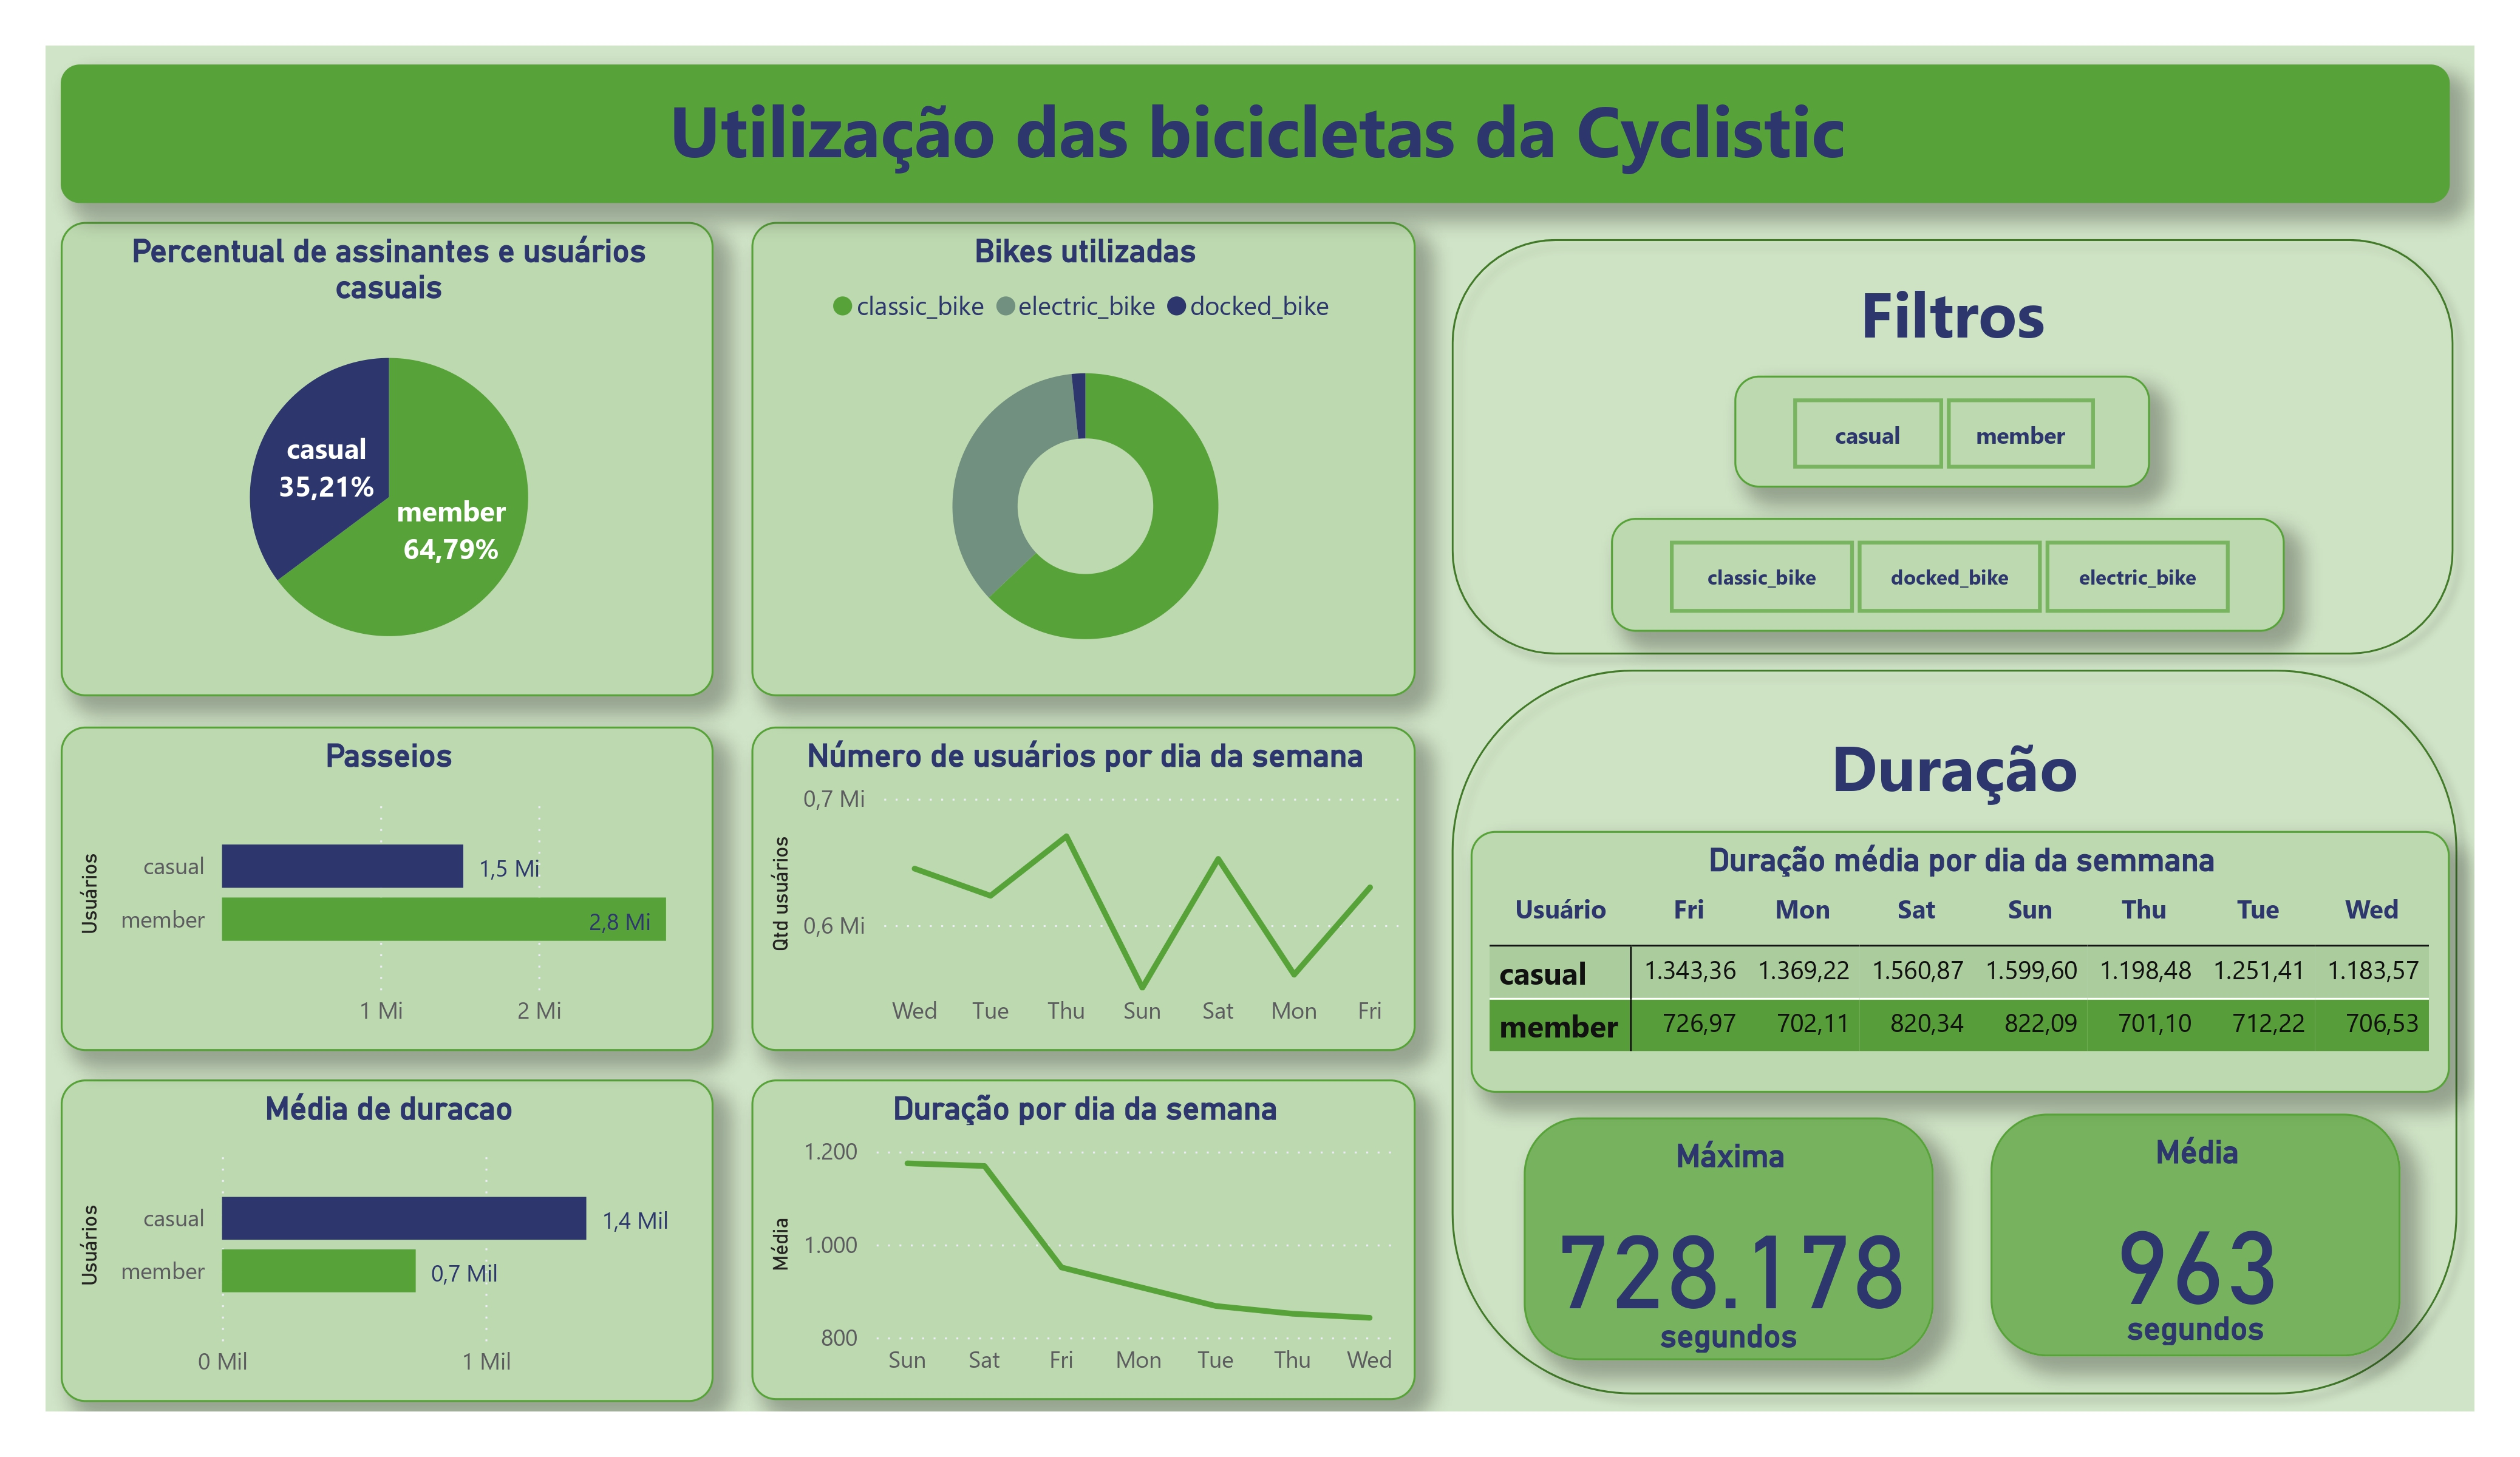

## Filtrando para visualizar os assinantes do serviço

* A maioria dos assinantes preferem as bicicletas clássicas
* Os passeios duram em média 735 segundos e o mais longo foi de ultrapassou os 89 mil segundos
* Não utilizam bicicletas acopladas

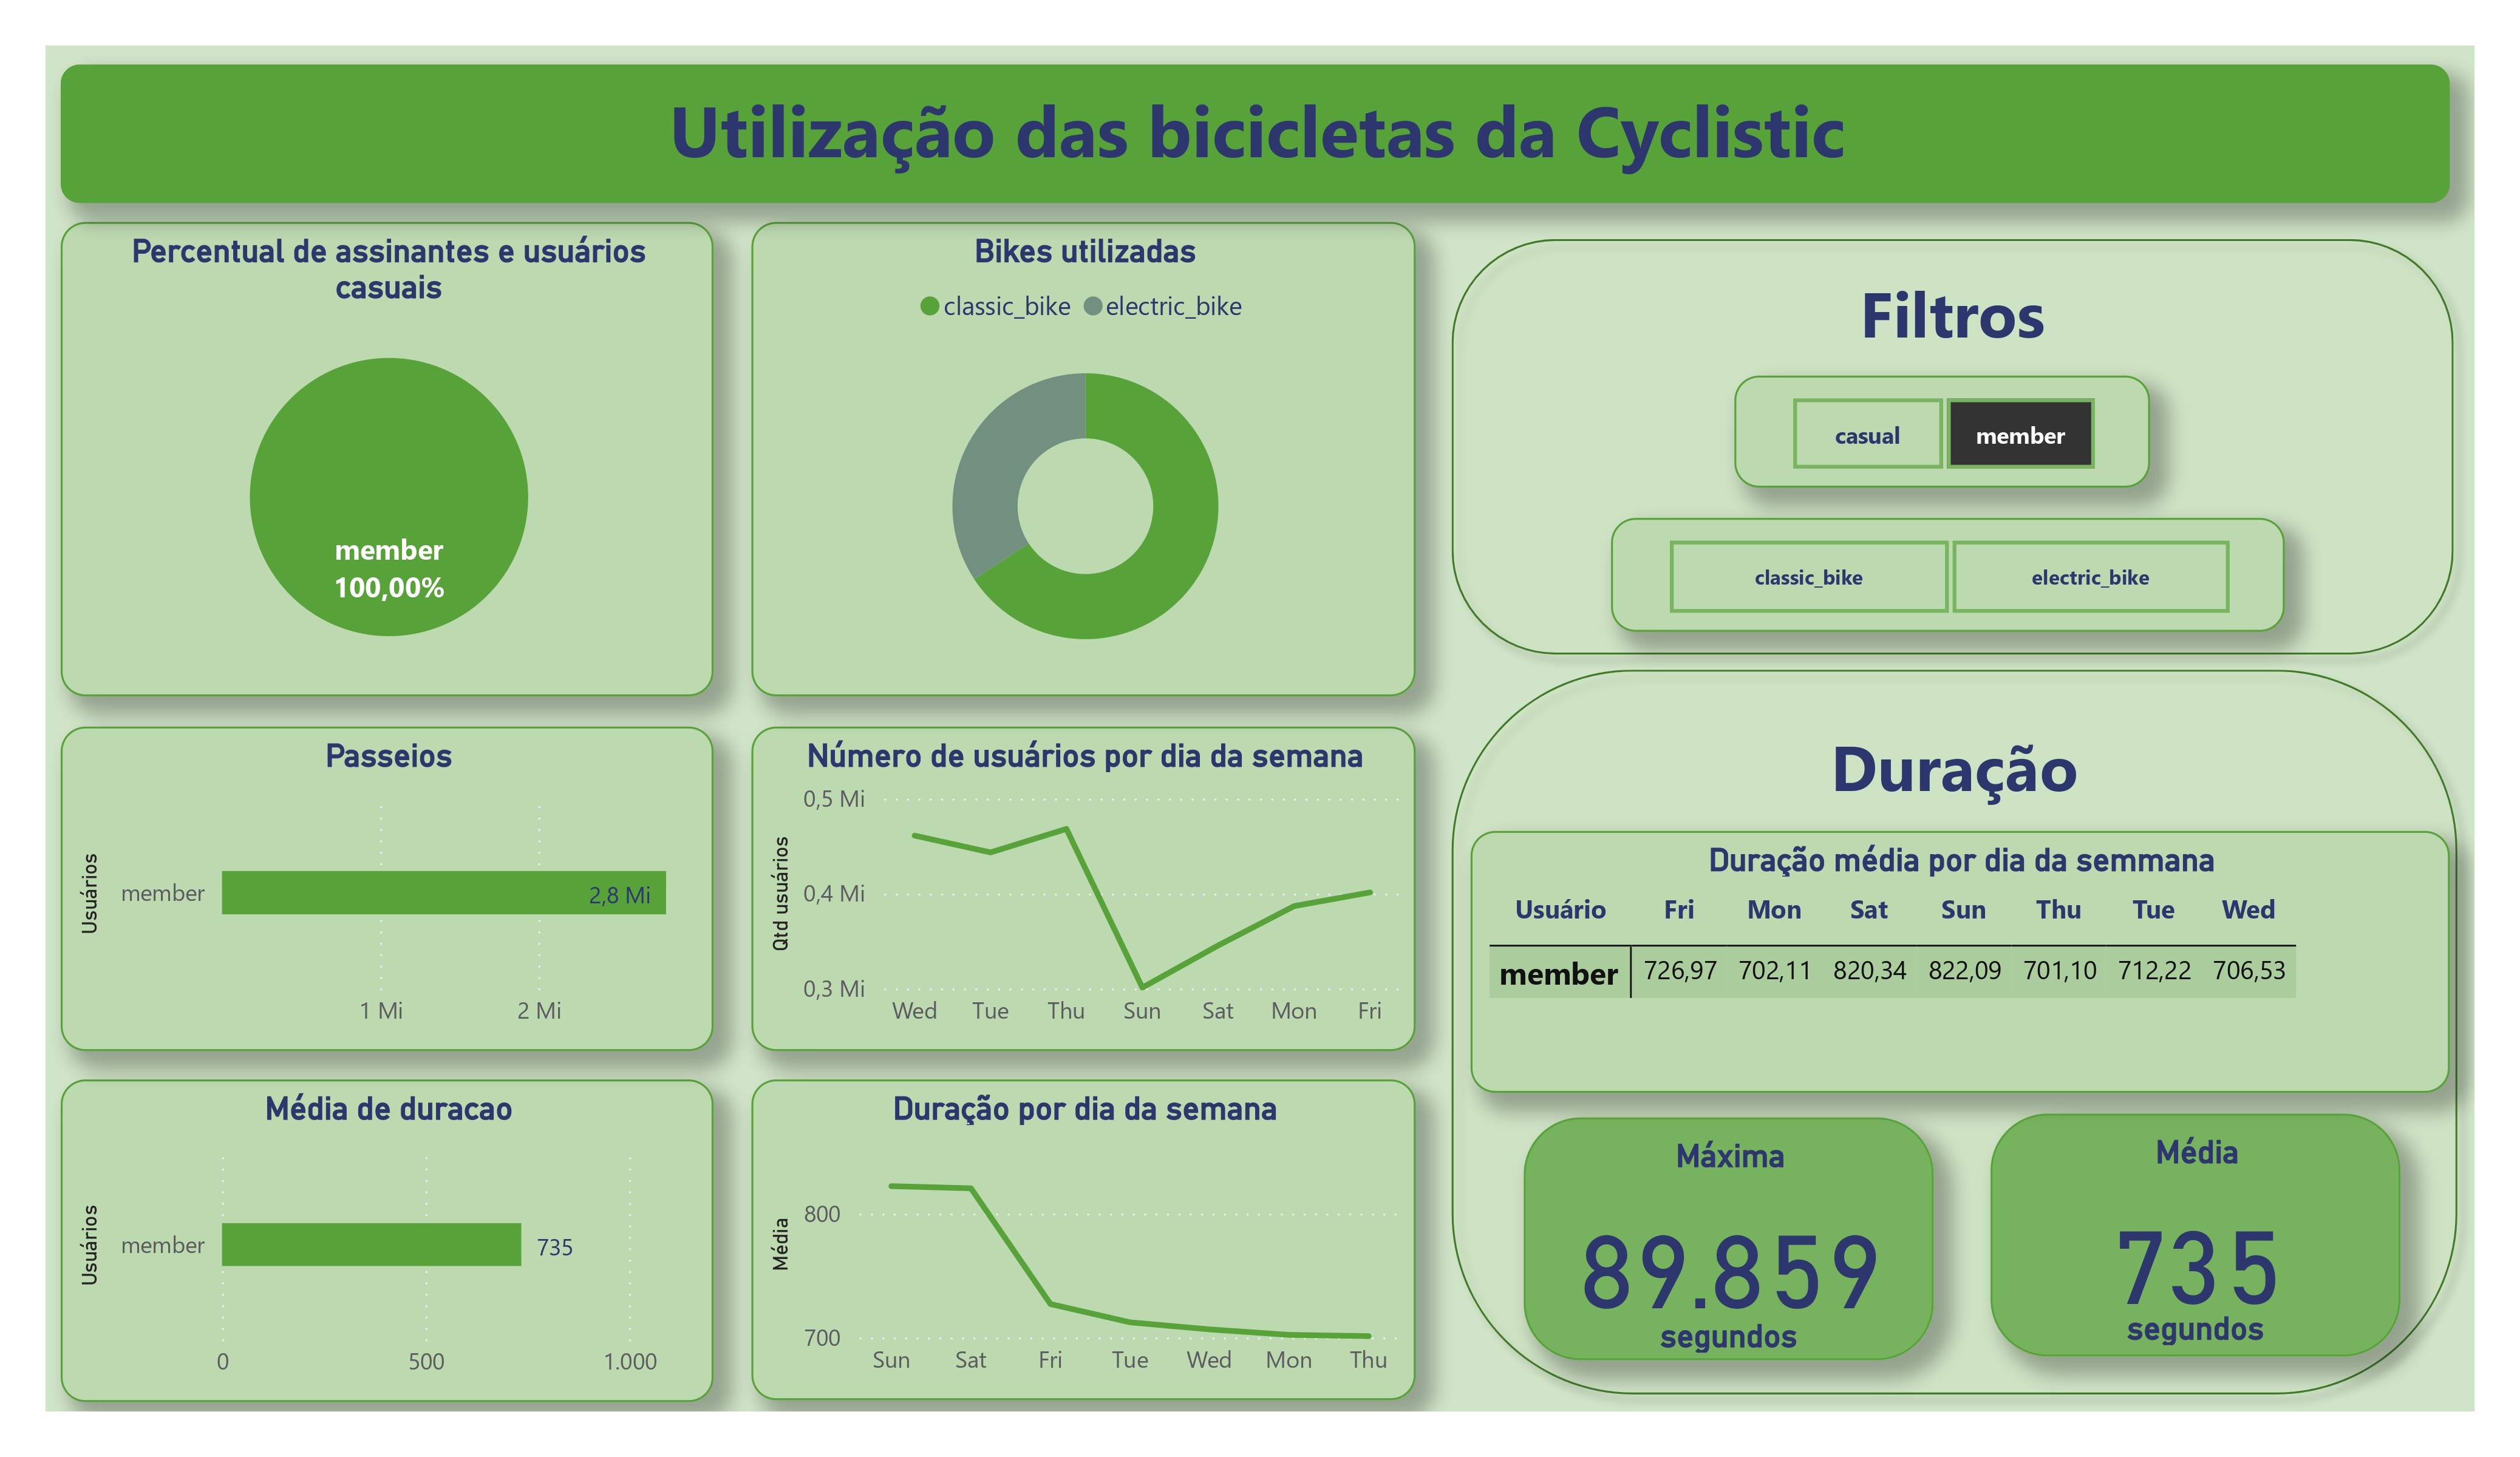

## Filtrando para visualizar os usuários casuais

* Os passeios duram em média 1387 segundos e o mais longo foi de ultrapassou os 728 mil segundos
* Utilizam as bikes acopladas
* O dia preferido é o domingo, seguido pelo sábado

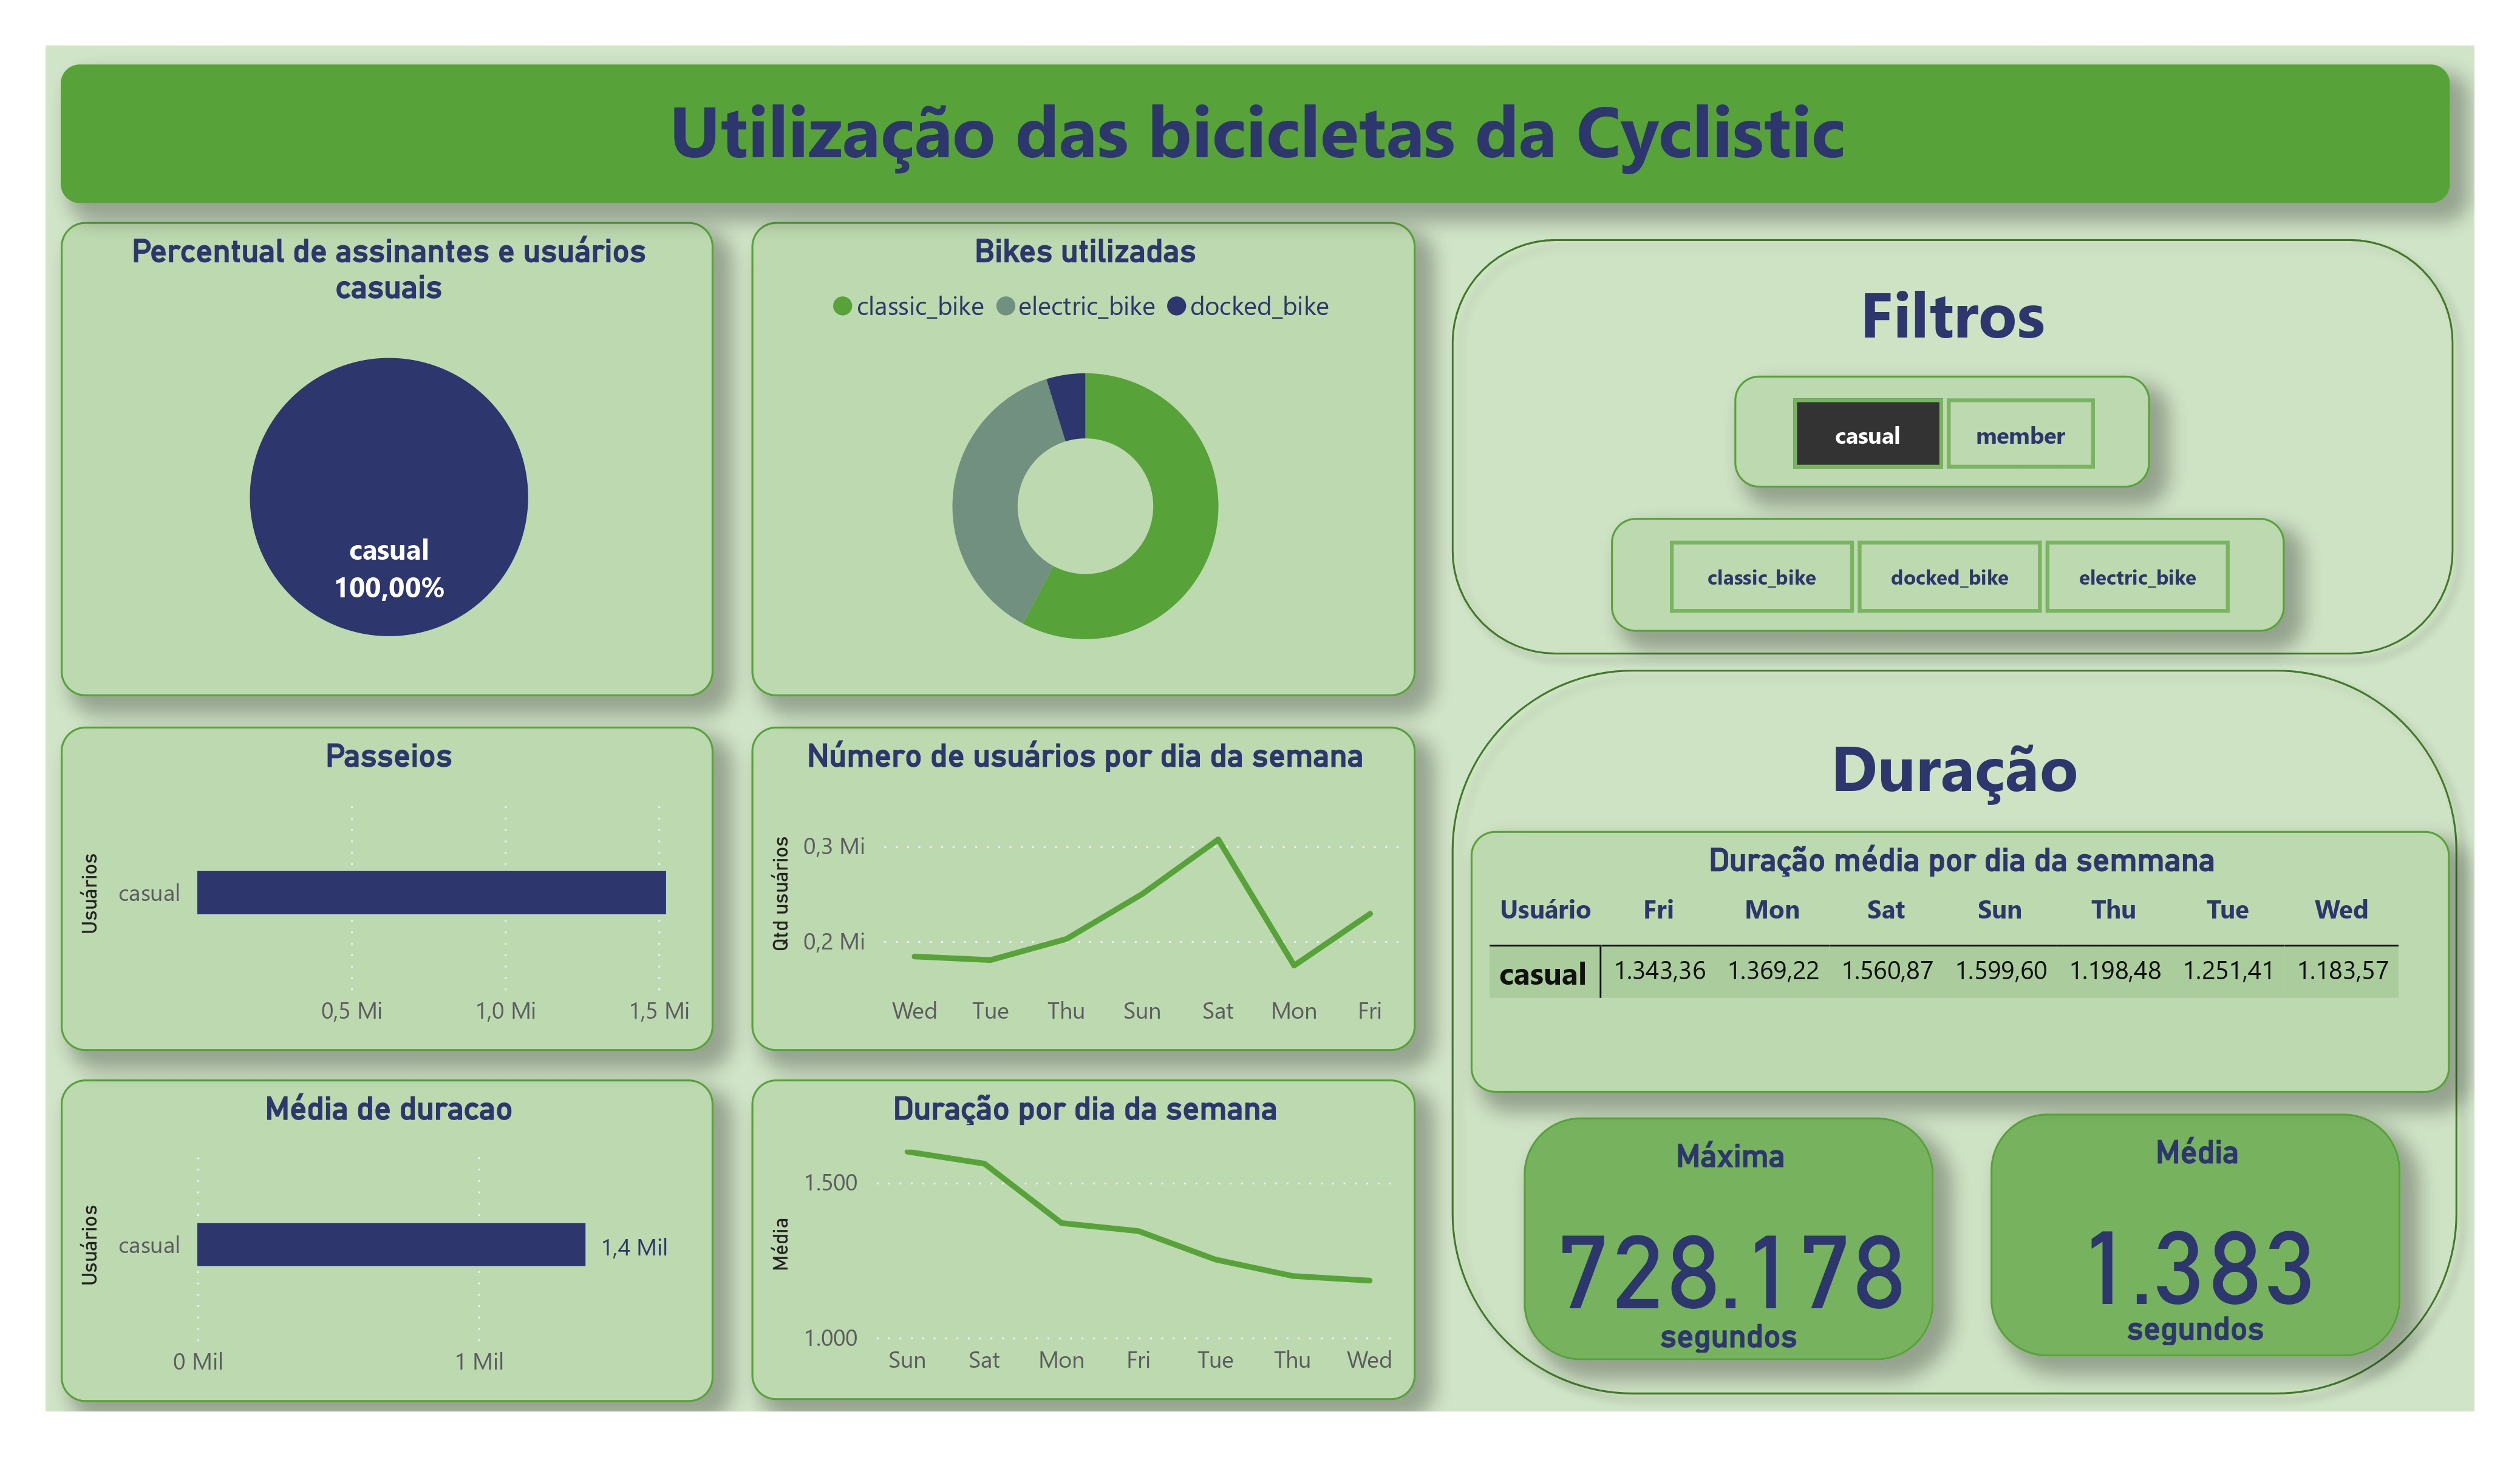

## Conclusão final

Entendemos que os assinantes utilizam o serviço como alternativa para se deslocarem durante a semana, enquanto os membros utilizam aos fins de semana e percorrem distâncias maiores considerando o tempo médio de viagem, mesmo durante os dias de semana. 
Não há registro do assinantes utilizando as bicicletas acopladas, seria necessário entender as regras de utilização e fazer uma pesquisa de campo para entendermos o motivo.
Reforçar as campanhas de marketing nos fins de semana para atingir a maioria dos usuários casuais, com o objetivo de convertê-los para assinantes. E para aqueles que percorrem distâncias maiores, disponibilizar mais bicicletas elétricas com alguma promoção para novos assinantes.
